# 1 Utils

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style("whitegrid")

In [2]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [3]:
data_folder = "..\\lstm_anomaly_thesis\\resources\\data\\discords\\AH\\"

In [4]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print (train_predictions.shape)
print (train_true.shape)


(10766, 5)
(10766,)


In [5]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print (np.shape(validation2_predictions))
print (np.shape(validation2_true))
print (np.shape(validation2_labels))
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print (np.shape(validation2_labels))

(13376, 5)
(13376,)
(13376, 5, 1)
(13376, 5)


In [6]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print (np.shape(test_predictions))
print (np.shape(test_true))
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print (np.shape(test_labels))

(13376, 5)
(13376,)
(13376, 5)


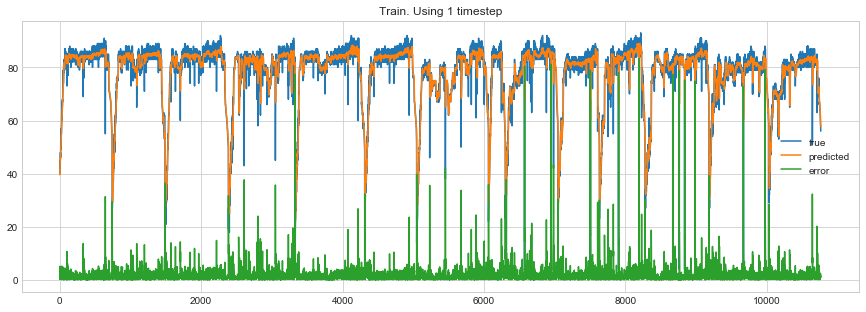

In [7]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]), label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

Mean 0.06854877245153788
STD 4.435999195268473


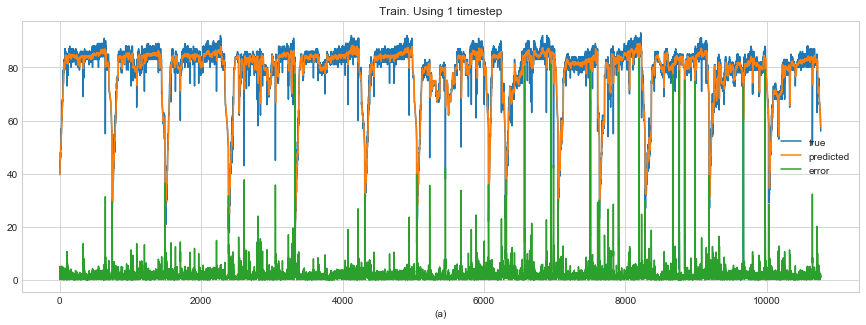

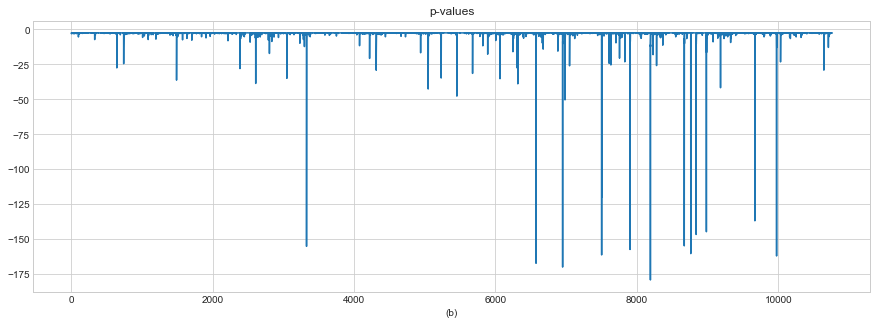

In [8]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print ('Mean',mean)
print ('STD',std)
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.xlabel("(a)")
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.xlabel("(b)")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [9]:
# %run -i '../lstm_anomaly_thesis/hello_code.py'

In [10]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print ()
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)

test_true_anomalies = np.where(test_labels[:,0]==1)

(array([ 1450,  1547,  2161,  2909,  3806,  4029,  4470,  4748,  4749,
        4750,  5519,  5520,  6241,  6365,  6920,  7295,  7361,  7362,
        7389,  7521,  7855,  7856,  7899,  7905,  8270,  8273,  8309,
        8382,  8644,  9258, 10341, 10345, 10346, 10347, 11235, 11353,
       12477, 12763, 13045], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


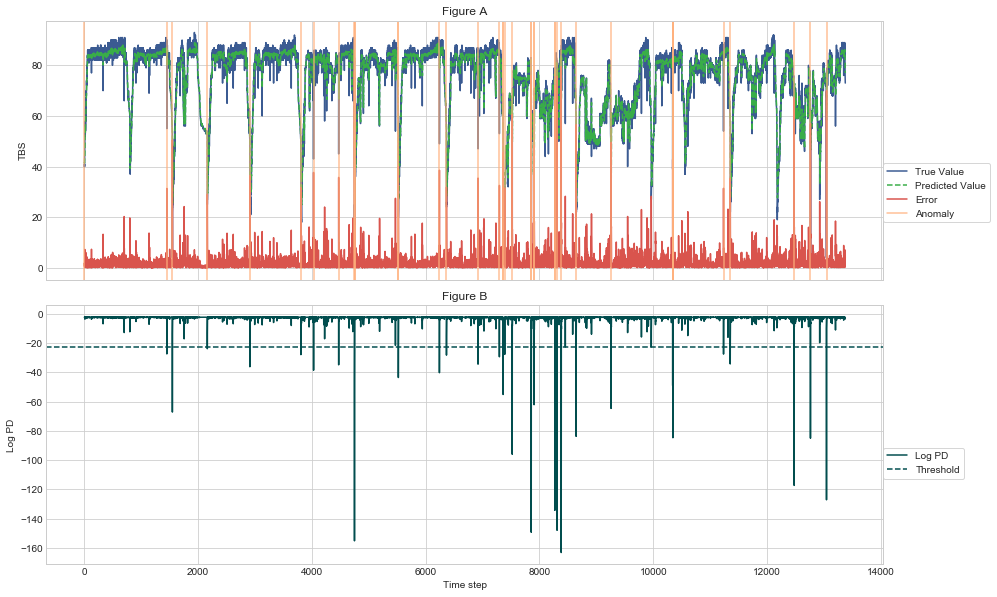

In [11]:
import matplotlib.gridspec as gridspec
threshold_v2 = -23

f = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1)

gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.025, hspace=0.05)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)
print (v2_below_threshold)

ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
ax1.axvline(x=0, color=sns.xkcd_rgb["peach"], alpha=0.8, label='Anomaly')

for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.8)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1,.45),borderaxespad=0.,frameon=True)
ax1.set_title('Figure A')
plt.ylabel("TBS")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
ax2.set_title('Figure B')
# ax2.text(.5, .05, '(b)', ha='center')
plt.ylabel("Log PD")

#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('AH.pdf')
pp.savefig(f)
pp.close()

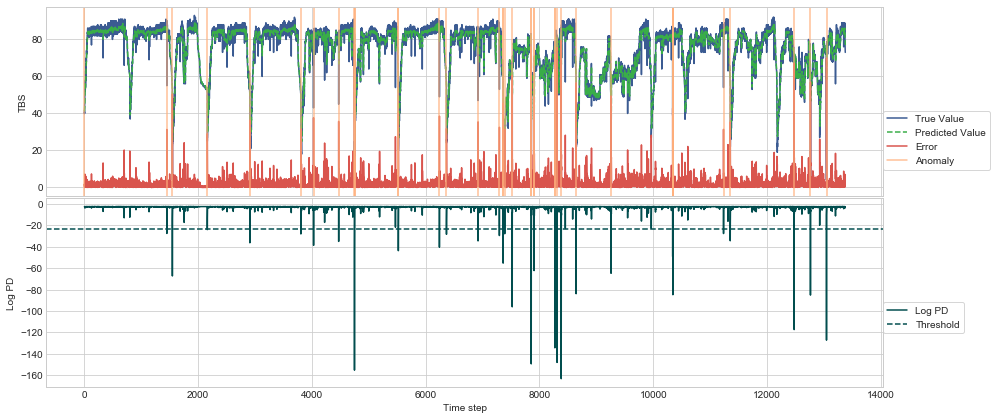

In [12]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
#plot test data
f = plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true, label='True Value', color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0], ls ='dashed', label='Predicted Value', color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]), label='Error', color=sns.xkcd_rgb["pale red"])

ax1.axvline(x=0, color=sns.xkcd_rgb["peach"], alpha=0.8, label='Anomaly')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=0.8)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("TBS")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('AH_test.pdf')
pp.savefig(f)
pp.close()

In [13]:
fig = plt.figure(figsize=(15,5))
plt.plot(np.append(np.roll(train_loss,1),train_loss[lookback_limit-1]),label='train')
#plt.plot(test_loss,label='test')
plt.xlim(1, lookback_limit)
plt.xticks(np.arange(1,lookback_limit+1,1))
#plt.legend()
plt.xlabel("Lookback")
plt.ylabel("MSE")
plt.show()
pp = PdfPages('ECG_lookbacks.pdf')
pp.savefig(fig)
pp.close()

NameError: name 'train_loss' is not defined

In [ ]:
plt.hist(train_error_vectors,bins = 100)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
fig = sm.qqplot(train_error_vectors, fit=True,line='s')
plt.show()

In [ ]:
import scipy.stats as stats
import matplotlib.pylab as pylab

error_vectors = np.reshape(train_error_vectors,[len(train_error_vectors)])
stats.probplot(error_vectors, plot=pylab)
plt.show()

In [ ]:
stats.normaltest(log_errors)

### 5.1.1 Chamber 1: 2017

# Other Analysis